In [ ]:
#Matthew Ewert
#ML Homework 7
#801323199

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
782/782 - 70s - 89ms/step - accuracy: 0.4275 - loss: 1.5716 - val_accuracy: 0.5114 - val_loss: 1.3710
Epoch 2/200
782/782 - 62s - 80ms/step - accuracy: 0.5708 - loss: 1.2117 - val_accuracy: 0.6013 - val_loss: 1.1387
Epoch 3/200
782/782 - 65s - 83ms/step - accuracy: 0.6318 - loss: 1.0464 - val_accuracy: 0.6182 - val_loss: 1.0862
Epoch 4/200
782/782 - 65s - 84ms/step - accuracy: 0.6671 - loss: 0.9478 - val_accuracy: 0.6546 - val_loss: 1.0128
Epoch 5/200
782/782 - 81s - 104ms/step - accuracy: 0.6958 - loss: 0.8744 - val_accuracy: 0.6840 - val_loss: 0.9246
Epoch 6/200
782/782 - 81s - 104ms/step - accuracy: 0.7162 - loss: 0.8147 - val_accuracy: 0.6813 - val_loss: 0.9220
Epoch 7/200
782/782 - 82s - 104ms/step - accuracy: 0.7312 - loss: 0.7654 - val_accuracy: 0.6934 - val_loss: 0.9153
Epoch 8/200
782/782 - 63s - 81ms/step - accuracy: 0.7482 - loss: 0.7230 - val_accuracy: 0.7076 - val_loss: 0.8565
Epoch 9/200
782/782 - 84s - 107ms/step - accuracy: 0.7605 - loss: 0.6834 - val_accura

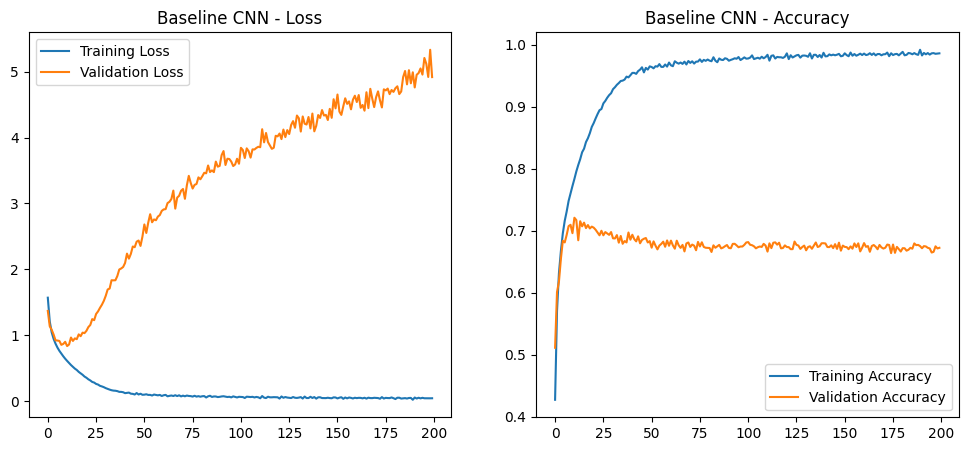

Baseline Model: Accuracy = 0.6726, Params = 122570, Time = 15292.89 sec


In [1]:
#1a
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_baseline_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

baseline_model = build_baseline_cnn()
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

start_time = time.time()
baseline_history = baseline_model.fit(x_train, y_train, epochs=200, batch_size=64,
                                      validation_data=(x_test, y_test), verbose=2)
end_time = time.time()
baseline_time = end_time - start_time

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.title('Baseline CNN - Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline CNN - Accuracy')
plt.legend()

plt.show()

baseline_accuracy = baseline_history.history['val_accuracy'][-1]
baseline_params = baseline_model.count_params()

print(f"Baseline Model: Accuracy = {baseline_accuracy:.4f}, Params = {baseline_params}, Time = {baseline_time:.2f} sec")


Epoch 1/200
782/782 - 70s - 90ms/step - accuracy: 0.4000 - loss: 1.6151 - val_accuracy: 0.5282 - val_loss: 1.2920
Epoch 2/200
782/782 - 81s - 104ms/step - accuracy: 0.5617 - loss: 1.2287 - val_accuracy: 0.5965 - val_loss: 1.1448
Epoch 3/200
782/782 - 81s - 104ms/step - accuracy: 0.6231 - loss: 1.0672 - val_accuracy: 0.6190 - val_loss: 1.0830
Epoch 4/200
782/782 - 82s - 105ms/step - accuracy: 0.6680 - loss: 0.9488 - val_accuracy: 0.6580 - val_loss: 0.9725
Epoch 5/200
782/782 - 82s - 105ms/step - accuracy: 0.6967 - loss: 0.8664 - val_accuracy: 0.6821 - val_loss: 0.9088
Epoch 6/200
782/782 - 66s - 85ms/step - accuracy: 0.7227 - loss: 0.7927 - val_accuracy: 0.7014 - val_loss: 0.8656
Epoch 7/200
782/782 - 82s - 105ms/step - accuracy: 0.7387 - loss: 0.7453 - val_accuracy: 0.7080 - val_loss: 0.8521
Epoch 8/200
782/782 - 65s - 83ms/step - accuracy: 0.7607 - loss: 0.6843 - val_accuracy: 0.7063 - val_loss: 0.8684
Epoch 9/200
782/782 - 83s - 106ms/step - accuracy: 0.7753 - loss: 0.6412 - val_accu

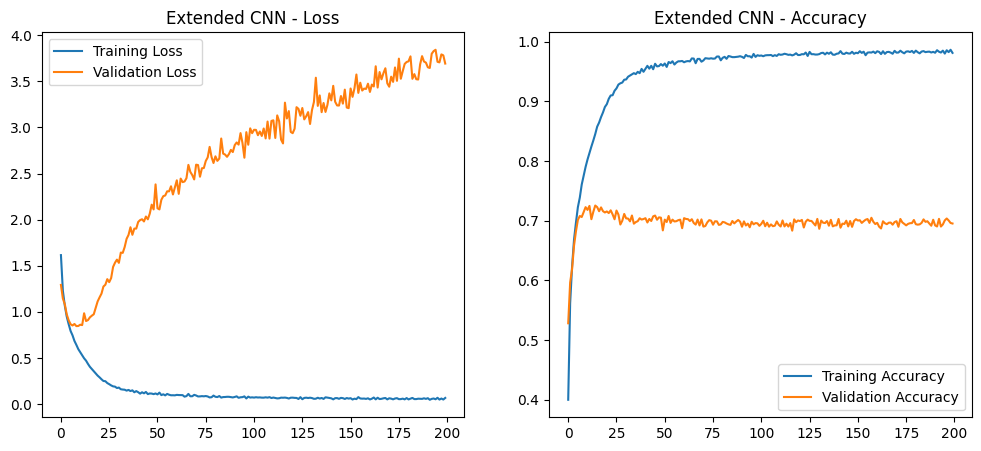

Extended Model: Accuracy = 0.6954, Params = 147978, Time = 15464.13 sec


In [4]:
#2b
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_extended_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

extended_model = build_extended_cnn()
extended_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

start_time = time.time()
extended_history = extended_model.fit(x_train, y_train, epochs=200, batch_size=64,
                                      validation_data=(x_test, y_test), verbose=2)
end_time = time.time()
extended_time = end_time - start_time

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(extended_history.history['loss'], label='Training Loss')
plt.plot(extended_history.history['val_loss'], label='Validation Loss')
plt.title('Extended CNN - Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(extended_history.history['accuracy'], label='Training Accuracy')
plt.plot(extended_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Extended CNN - Accuracy')
plt.legend()

plt.show()

extended_accuracy = extended_history.history['val_accuracy'][-1]
extended_params = extended_model.count_params()

print(f"Extended Model: Accuracy = {extended_accuracy:.4f}, Params = {extended_params}, Time = {extended_time:.2f} sec")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Epoch 1/200
782/782 - 48s - 62ms/step - accuracy: 0.5831 - loss: 1.1680 - val_accuracy: 0.4519 - val_loss: 1.8750
Epoch 2/200
782/782 - 67s - 86ms/step - accuracy: 0.7515 - loss: 0.7179 - val_accuracy: 0.7051 - val_loss: 0.8652
Epoch 3/200
782/782 - 42s - 53ms/step - accuracy: 0.8075 - loss: 0.5596 - val_accuracy: 0.7637 - val_loss: 0.7053
Epoch 4/200
782/782 - 42s - 53ms/step - accuracy: 0.8436 - loss: 0.4584 - val_accuracy: 0.7737 - val_loss: 0.6803
Epoch 5/200
782/782 - 40s - 52ms/step - accuracy: 0.8688 - loss: 0.3810 - val_accuracy: 0.8009 - val_loss: 0.5835
Epoch 6/200
782/782 - 42s - 54ms/step - accuracy: 0.8923 - loss: 0.3149 - val_accuracy: 0.7500 - val_loss: 0.7672
Epoch 7/200
782/782 - 42s - 53ms/step - accuracy: 0.9111 - loss: 0.2601 - val_accuracy: 0.8227 - val_loss: 0.5564
Epoch 8/200
782/782 - 40s - 51ms/step - accuracy: 0.9263 - loss: 0.2115 - val_accuracy: 0.7744 - val_loss: 0.8203
Epoch 9/200
782/782 - 42s - 54ms/s

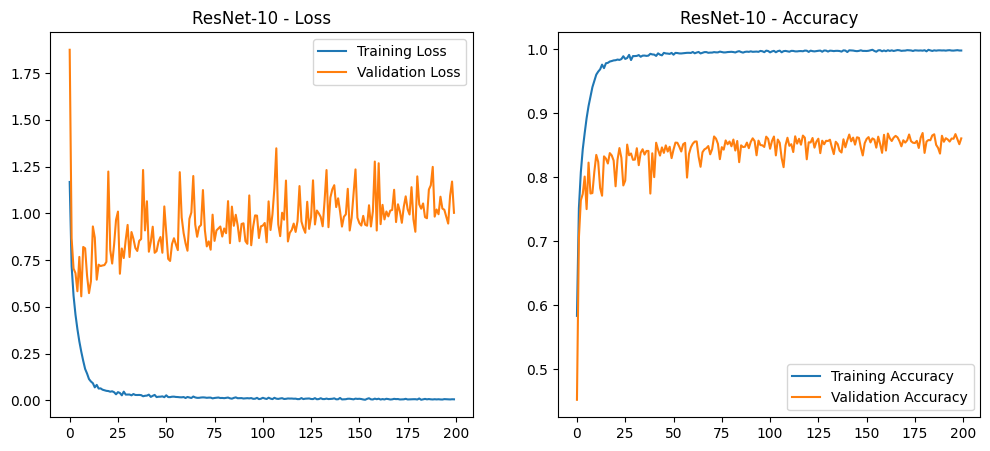

ResNet-10: Accuracy = 0.8606, Params = 975242, Time = 7743.31 sec


In [1]:
#2
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def resnet_block(inputs, filters, strides=1):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)

    if strides > 1 or inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters, (1, 1), strides=strides, padding="same")(inputs)

    x = layers.Add()([x, inputs])
    x = layers.ReLU()(x)
    return x

def build_resnet10():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), strides=1, padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    for _ in range(2):
        x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    for _ in range(2):
        x = resnet_block(x, 128)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation="softmax")(x)
    model = models.Model(inputs, x)
    return model

def train_and_evaluate(model, epochs=200, batch_size=64, model_name="Model"):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=2)
    end_time = time.time()
    training_time = end_time - start_time
    return history, training_time

resnet_model = build_resnet10()
resnet_history, resnet_time = train_and_evaluate(resnet_model, model_name="ResNet-10")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('ResNet-10 - Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-10 - Accuracy')
plt.legend()

plt.show()

resnet_accuracy = resnet_history.history['val_accuracy'][-1]
resnet_params = resnet_model.count_params()

print(f"ResNet-10: Accuracy = {resnet_accuracy:.4f}, Params = {resnet_params}, Time = {resnet_time:.2f} sec")
